In [252]:
import numpy as np
import pandas as pd

In [ ]:
coordinate= 10*np.random.rand(2,11)
coordinate

In [254]:
data=pd.DataFrame(coordinate.T, columns=['X','Y'])
data

,X,Y
0,1.519396,6.924887
1,0.849334,6.105772
2,4.616714,0.737734
3,6.950139,3.365026
4,5.722426,6.217042
5,0.258757,3.012928
6,6.313663,9.725975
7,4.654804,3.303129
8,8.939493,7.730841
9,6.686664,8.062562


### 거리행렬 구하기

In [255]:
from sklearn.metrics import pairwise_distances

In [256]:
data

,X,Y
0,1.519396,6.924887
1,0.849334,6.105772
2,4.616714,0.737734
3,6.950139,3.365026
4,5.722426,6.217042
5,0.258757,3.012928
6,6.313663,9.725975
7,4.654804,3.303129
8,8.939493,7.730841
9,6.686664,8.062562


In [257]:
states = np.arange(0,11).astype(str)
states

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
      dtype='<U11')

In [258]:
distance = np.zeros(shape=(11,11))
for i in range(len(data)):
    for j in range(len(data)):
        distance[i,j]=np.sqrt(np.sum(data.iloc[i]**2+data.iloc[j]**2))
distance = pd.DataFrame(distance,index=states, columns= states)    

In [259]:
distance

,0,1,2,3,4,5,6,7,8,9,10
0,10.026228,9.394915,8.492404,10.482865,11.029977,7.707614,13.591157,9.101674,13.781983,12.648281,10.530489
1,9.394915,8.718006,7.736932,9.880772,10.459426,6.866331,13.132355,8.401171,13.329751,12.153938,9.931283
2,8.492404,7.736932,6.611853,9.026967,9.656919,5.568033,12.502609,7.378086,12.709789,11.470601,9.082228
3,10.482865,9.880772,9.026967,10.920424,11.446642,8.292920,13.931431,9.602379,14.117658,13.013233,10.966148
4,11.029977,10.459426,9.656919,11.446642,11.949709,8.974546,14.347638,10.196844,14.528531,13.457866,11.490272
5,7.707614,6.866331,5.568033,8.292920,8.974546,4.276609,11.983389,6.459299,12.199391,10.902343,8.353039
6,13.591157,13.132355,12.502609,13.931431,14.347638,11.983389,16.398593,12.924194,16.557094,15.626046,13.967301
7,9.101674,8.401171,7.378086,9.602379,10.196844,6.459299,12.924194,8.071909,13.124721,11.928715,9.654347
8,13.781983,13.329751,12.709789,14.117658,14.528531,12.199391,16.557094,13.124721,16.714092,15.792303,14.153057
9,12.648281,12.153938,11.470601,13.013233,13.457866,10.902343,15.626046,11.928715,15.792303,14.813264,13.051627


### transition

$P_{ss`}^a$

action = {go fisrt node, second node, third node}

In [260]:
P_go_first= pd.DataFrame(np.matrix([[0,1,0,0,0,0,0,0,0,0,0],
                                    [0,0,1,0,0,0,0,0,0,0,0],
                                    [0,0,0,1,0,0,0,0,0,0,0],
                                    [0,0,0,0,1,0,0,0,0,0,0],
                                    [0,0,0,0,0,1,0,0,0,0,0],
                                    [0,0,0,0,0,0,1,0,0,0,0],
                                    [0,0,0,0,0,0,0,1,0,0,0],
                                    [0,0,0,0,0,0,0,0,1,0,0],
                                    [0,0,0,0,0,0,0,0,0,1,0],
                                    [0,0,0,0,0,0,0,0,0,0,1],
                                    [0,1,0,0,0,0,0,0,0,0,0],
                                                        ]),index= states, columns=states )

P_go_second= pd.DataFrame(np.matrix([[0,0,0,0,0,0,0,0,0,1,0],
                                    [0,0,0,0,0,0,0,0,1,0,0],
                                    [0,0,0,0,0,0,0,1,0,0,0],
                                    [0,0,0,0,0,0,1,0,0,0,0],
                                    [0,0,0,0,0,1,0,0,0,0,0],
                                    [0,0,0,0,1,0,0,0,0,0,0],
                                    [0,0,0,1,0,0,0,0,0,0,0],
                                    [0,0,1,0,0,0,0,0,0,0,0],
                                    [0,1,0,0,0,0,0,0,0,0,0],
                                    [1,0,0,0,0,0,0,0,0,0,0],
                                    [0,0,0,0,0,0,0,0,0,1,0],
                                                        ]),index= states, columns=states )

P_go_third= pd.DataFrame(np.matrix([[0,0,0,1,0,0,0,0,0,0,0],
                                    [0,0,0,0,0,1,0,0,0,0,0],
                                    [0,0,1,0,0,0,0,0,0,0,0],
                                    [0,0,0,0,0,0,1,0,0,0,0],
                                    [0,1,0,0,0,0,0,0,0,0,0],
                                    [0,0,0,1,0,0,0,0,0,0,0],
                                    [0,0,1,0,0,0,0,0,0,0,0],
                                    [0,0,0,0,0,1,0,0,0,0,0],
                                    [0,0,0,0,1,0,0,0,0,0,0],
                                    [0,0,0,0,0,0,0,0,0,0,1],
                                    [0,0,0,0,0,0,0,0,0,0,1]
                                                        ]),index= states, columns=states )

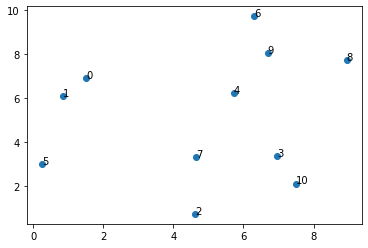

In [261]:
import matplotlib.pyplot as plt

y = data['Y']
x = data['X']
n = states

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(n[i], (x[i], y[i]))

### R_s_a

Reward는 노드간 거리로 계산

In [262]:
R_s_a = pd.DataFrame( np.c_[np.repeat( 0, len( states ) ), np.repeat( 0, len( states ) ),np.repeat( 0, len( states ) )], index = states,
                      columns = ['first', 'second','third'] )

R_s_a=R_s_a.astype('float')

In [263]:
for i in range(11):
    R_s_a['first'][i]=-distance.iloc[i,P_go_first.iloc[i][P_go_first.iloc[i].values==1][0]].astype(float)
    
for i in range(11):
    R_s_a['second'][i]=-distance.iloc[i,P_go_second.iloc[i][P_go_second.iloc[i].values==1][0]].astype(float)
    
for i in range(11):
    R_s_a['third'][i]=-distance.iloc[i,P_go_third.iloc[i][P_go_third.iloc[i].values==1][0]].astype(float)

In [264]:
R_s_a

,first,second,third
0,-9.394915,-9.394915,-9.394915
1,-8.718006,-8.718006,-8.718006
2,-7.736932,-7.736932,-7.736932
3,-9.880772,-9.880772,-9.880772
4,-10.459426,-10.459426,-10.459426
5,-6.866331,-6.866331,-6.866331
6,-13.132355,-13.132355,-13.132355
7,-8.401171,-8.401171,-8.401171
8,-13.329751,-13.329751,-13.329751
9,-12.153938,-12.153938,-12.153938


### policy

In [267]:
pi_50 = pd.DataFrame( np.c_[np.repeat( 1/3, len( states ) ), np.repeat( 1/3, len( states ) ),np.repeat( 1/3, len( states ) )], index = states,
                      columns = ['first', 'second','third'] )

pi_50

,first,second,third
0,0.333333,0.333333,0.333333
1,0.333333,0.333333,0.333333
2,0.333333,0.333333,0.333333
3,0.333333,0.333333,0.333333
4,0.333333,0.333333,0.333333
5,0.333333,0.333333,0.333333
6,0.333333,0.333333,0.333333
7,0.333333,0.333333,0.333333
8,0.333333,0.333333,0.333333
9,0.333333,0.333333,0.333333


### sumul step

In [268]:
def simul_step(pi, s_now, P_go_first,P_go_second, P_go_third, R_s_a):
    if np.random.uniform() < pi_50.loc[s_now].cumsum()[0] :
        a_now ='first'
        P = P_go_first
        
    elif  pi_50.loc[s_now].cumsum()[0]< np.random.uniform() < pi_50.loc[s_now].cumsum()[1]:
        a_now ='second'
        P = P_go_second
    
    else : 
        a_now = 'third'
        P = P_go_third 
        
    r_now = R_s_a.loc[s_now , a_now]
    s_next = states[np.argmin( P.loc[s_now].cumsum() < np.random.uniform() )]
    
    if np.random.uniform() < pi_50.loc[s_now].cumsum()[0] :
        a_next ='first'
        
    elif  pi_50.loc[s_now].cumsum()[0]< np.random.uniform() < pi_50.loc[s_now].cumsum()[1]:
        a_next ='second'

    
    else : 
        a_next = 'third'
       
    sarsa = [s_now, a_now, r_now, s_next, a_next]
    
    return sarsa 
        
sample_step = simul_step(pi_50, '0', P_go_first,P_go_second, P_go_third, R_s_a )

print( sample_step )        

['0', 'second', -9.394915481943585, '9', 'second']


In [269]:
for i in range(10):
    test_state = str(i)
    sample_step = simul_step(pi_50, test_state, P_go_first,P_go_second, P_go_third, R_s_a )
    print( sample_step )    

['0', 'first', -9.394915481943585, '1', 'third']
['1', 'third', -8.718006291295852, '5', 'third']
['2', 'third', -7.736932032654173, '2', 'first']
['3', 'first', -9.880771658924335, '4', 'third']
['4', 'third', -10.459426046525717, '1', 'first']
['5', 'third', -6.8663314378526685, '3', 'third']
['6', 'first', -13.132354911794453, '7', 'first']
['7', 'third', -8.401170842212359, '5', 'first']
['8', 'first', -13.329750957381886, '9', 'first']
['9', 'first', -12.153938039172072, '10', 'first']


In [270]:
q_s_a_init= pd.DataFrame( np.c_[np.repeat(0, len( states ) ), np.repeat(0, len( states ) ),np.repeat(0, len( states ) )], index = states,
                      columns = ['first', 'second','third'] ).astype(float)

q_s_a_init

,first,second,third
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [271]:
sample_step = simul_step(pi_50, '0', P_go_first,P_go_second, P_go_third, R_s_a )
sample_step

['0', 'first', -9.394915481943585, '1', 'second']

In [272]:
def pol_eval_TD(sample_step, q_s_a, alpha):
    q_s_a_copy= q_s_a.copy()
    s = sample_step[0]
    a = sample_step[1]
    r = sample_step[2]
    s_next = sample_step[3]
    a_next = sample_step[4]

    q_s_a_copy.loc[s,a] +=alpha*(r+q_s_a_copy.loc[s_next, a_next]-q_s_a_copy.loc[s,a])

    return q_s_a_copy


q_s_a=pol_eval_TD(sample_step, q_s_a_init, alpha = 0.1)
q_s_a

,first,second,third
0,-0.939492,0.0,0.0
1,0.000000,0.0,0.0
2,0.000000,0.0,0.0
3,0.000000,0.0,0.0
4,0.000000,0.0,0.0
5,0.000000,0.0,0.0
6,0.000000,0.0,0.0
7,0.000000,0.0,0.0
8,0.000000,0.0,0.0
9,0.000000,0.0,0.0


In [280]:
q_s_a_init.loc['0','first']

0.0

In [273]:
def pol_imp(pi, q_s_a, epsilon): # epsilon = exploration_rate
    pi_copy =pi.copy()
    for i in range(pi.shape[0]):
        # exploitation
        if np.random.uniform() > epsilon:
            pi_copy.iloc[i] = 0
            pi_copy.iloc[i, np.argmax(q_s_a.iloc[i,])] = 1

            

        else:
            # exploration
            pi_copy.iloc[i] = 1/q_s_a.shape[1]


    return pi_copy

In [274]:
pol_imp(pi_50, q_s_a, epsilon=0)

,first,second,third
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [ ]:
import time
num_ep = 10**4
beg_time =time.time()
q_s_a = q_s_a_init
pi=pi_50
exploration_rate = 1


for epi_i in range(1,num_ep) :
    s_now="0"
    while s_now != "10":
        sample_step = simul_step(pi_50, s_now, P_go_first,P_go_second, P_go_third, R_s_a )
        q_s_a = pol_eval_TD(sample_step, q_s_a, alpha = 1/epi_i)
        pi = pol_imp(pi, q_s_a, epsilon= exploration_rate)
        s_now = sample_step[3]
        exploration_rate *=0.9995
        #print(sample_step)
end_time =time.time()

print("Time difference of {} sec".format(end_time- beg_time))
print(pi.T)
print(q_s_a.T)

In [278]:
R_s_a

,first,second,third
0,-9.394915,-9.394915,-9.394915
1,-8.718006,-8.718006,-8.718006
2,-7.736932,-7.736932,-7.736932
3,-9.880772,-9.880772,-9.880772
4,-10.459426,-10.459426,-10.459426
5,-6.866331,-6.866331,-6.866331
6,-13.132355,-13.132355,-13.132355
7,-8.401171,-8.401171,-8.401171
8,-13.329751,-13.329751,-13.329751
9,-12.153938,-12.153938,-12.153938
